

*   Họ tên: Đinh Phú Cường
*   MSSV: 20DH111722



#1 - Giới thiệu

##Giới thiệu tập dữ liệu

Video Game Sales: https://www.kaggle.com/datasets/gregorut/videogamesales


Tập dữ liệu này chứa danh sách các trò chơi điện tử có doanh số lớn hơn 100.000 bản. Nó được tạo ra bởi một mẩu vgchartz.com.

Gồm các thuộc tích sau: 

* Rank - Xếp hạng tổng số doanh thu

* Name - Tên trò chơi

* Platform - Nền tảng trò chơi được phát hành (i.e. PC,PS4, etc.)

* Year - Năm trò chơi được phát hành

* Genre - Thể loại trò chơi

* Publisher - Nhà phát hành của trò chơi

* NA_Sales - Doanh số ở Bắc Mỹ (triệu)

* EU_Sales - Doanh số ở Châu Âu (triệu)

* JP_Sales - Doanh số ở Nhật Bản (triệu)

* Other_Sales - Doanh số ở khu vực khác (triệu)

* Global_Sales - Tổng doanh số trên toàn thế giới.




##Giới thiệu bài toán

 Sử dụng mô hình hồi quy để dự đoán doanh số của các trò chơi mới, tìm ra các yếu tố quan trọng và có thể cải thiện doanh số, hỗ trợ quyết định kinh doanh và chiến lược phát triển trong ngành công nghiệp trò chơi điện tử.

#2 - Thư viện

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler

from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
import itertools
from sklearn.metrics import r2_score

#3 - Tập dữ liệu

In [ ]:
#Tải tập dữ liệu
#https://drive.google.com/file/d/1l5Nh3lSXo4i8LbnEiWWT1CDI7RH-RnMG/view?usp=share_link
%%shell
gdown --q 1l5Nh3lSXo4i8LbnEiWWT1CDI7RH-RnMG
echo 'download: done => file: vgsales.csv'

download: done => file: vgsales.csv


In [ ]:
#Load tập dữ liệu
df = pd.read_csv("/content/vgsales.csv")

#4 - Khám phá tập dữ liệu

## 4.1 - Thông tin cơ bản

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
df.sample(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
3003,3005,Country Dance,Wii,2011.0,Misc,Funbox Media,0.59,0.04,0.00,0.04,0.68
4326,4328,The Powerpuff Girls: Relish Rampage,PS2,2002.0,Action,BAM! Entertainment,0.22,0.17,0.00,0.06,0.45
14063,14065,Sins of a Solar Empire: Trinity,PC,2010.0,Strategy,Kalypso Media,0.00,0.03,0.00,0.01,0.04
11695,11697,One Piece: Gear Spirit,DS,2007.0,Fighting,Namco Bandai Games,0.00,0.00,0.08,0.00,0.08
6444,6446,Dungeons & Dragons: Eye of the Beholder,GBA,2002.0,Role-Playing,Atari,0.19,0.07,0.00,0.00,0.26


## 4.2 - Kiểm tra giá trị null

In [ ]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
#Xử lý giá trị null
df["Publisher"].fillna("Unknown", inplace = True)

##4.3- Kiểm tra giá trị lặp trong tập dữ liệu

In [ ]:
df.duplicated().sum()

0

##4.4- thống kê tập dữ liệu

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
EU_Sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
JP_Sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other_Sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


## 4.5- Trực quan hóa tập dữ liệu

In [ ]:
#Số lượng trò chơi mỗi thể loại
genre_game_count = df.Genre.value_counts()
print(f"Số lượng trò chơi mỗi thể loại:\n{genre_game_count}")

Số lượng trò chơi mỗi thể loại:
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64


In [ ]:
genre_bar = px.bar(genre_game_count, color = "value", color_continuous_scale=["#FF0000", "#00FF00"]).update_layout(title ="Số lượng trò chơi mỗi thể loại",
                                      xaxis_title = "Thể loại", yaxis_title = "Số lượng trò chơi")
genre_bar.show()

Số lượng trò chơi mỗi thể loại:
* Thể loại hành dộng (Action) có số lượng trò chơi cao nhất
* Thể loại giải đố (Puzzel) có số lượng trò chơi ít nhất

In [ ]:
#Số lượng trò chơi của mỗi nhà phát hành
publisher_game_count = df.Publisher.value_counts().nlargest(51).reset_index()
publisher_game_count.columns = ["Publisher", "Số lượng"]
publisher_game_count

,Publisher,Số lượng
0,Electronic Arts,1351
1,Activision,975
2,Namco Bandai Games,932
3,Ubisoft,921
4,Konami Digital Entertainment,832
5,THQ,715
6,Nintendo,703
7,Sony Computer Entertainment,683
8,Sega,639
9,Take-Two Interactive,413


In [ ]:
bar = px.bar(publisher_game_count, x="Publisher", y="Số lượng", color="Số lượng",
             color_continuous_scale=["#FF0000", "#00FF00"], title="Số lượng trò chơi của mỗi nhà phát hành",
             labels={"Publisher": "Nhà phát hành", "Số lượng": "Số lượng trò chơi"})
bar.show()

Số lượng trò chơi mỗi nhà phát hành:
* Nhà phát hành Electronic Arts có số lượng trò chơi cao nhất
* Nhà phát hành MTV Games có số lượng thấp nhất

In [ ]:
# Tổng doanh số bán hàng trong tất cả các năm theo khu vực
region_sales = df.groupby('Year').sum(numeric_only=True).drop(['Global_Sales','Rank'], axis=1).sum()

region_sales = pd.DataFrame({'region_sales': region_sales.values}, index=region_sales.index)

reg = px.pie(region_sales,
            values='region_sales', names=region_sales.index,
            title='Tổng doanh số theo khu vực',
            hover_data=['region_sales'])
reg.show()

Trong biểu đồ doanh số theo khu vực:
* Khu vực Bắc Mỹ chiếm 49% doanh số, rất cao so với 3 khu vực khác
* Ở các khu vực khác Bắc Mỹ, Châu Âu, Nhật Bản có doanh số thấp nhất 8.95%

In [ ]:
# Nhóm dữ liệu theo cột nền tảng và tính tổng của các cột doanh số
platform_grouped = df.groupby('Platform').sum(numeric_only=True)

# Sắp xếp Global_Sales theo thứ tự giảm dần
platform_sales = platform_grouped.sort_values('Global_Sales', ascending=False)
platform_sales = platform_grouped['Global_Sales']

# Lọc ra các nền tảng có doanh số dưới 100 triệu
platform_sales = platform_sales.loc[platform_sales > 100]

fig = px.pie(platform_sales, values='Global_Sales', names=platform_sales.index,
             title='Tổng doanh số bán hàng toàn cầu theo nền tảng',
             hover_data=['Global_Sales'])

fig.show()

Trong biểu đồ tổng doanh số bán hàng toàn cầu theo nền tảng:
* Platfrom PS2 có doanh số cao nhất và XOne là doanh số thấp nhất
* Có 4 platfrom có doanh thu hơn 10% là Wii, PS3, X360, PS2

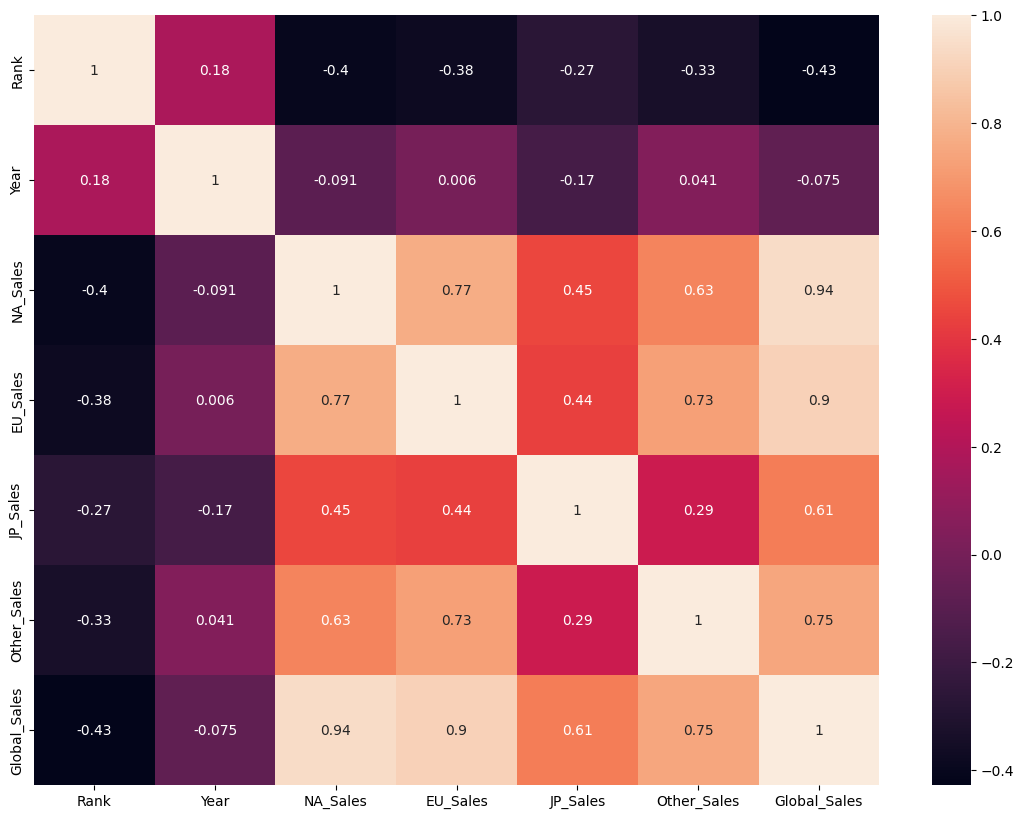

In [ ]:
plt.figure(figsize=(30,10))
plt.subplot(121)
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

Trong biết đồ heatmap:
* Độ tương quan của cột Rank và Year với cột Global_Sales rất thấp.
* Độ tương quan của cột NA_Sales, EU_Sales, JP_Sales, Other_Sales rất cao

#5 - Tiền xử lý dữ liệu

In [ ]:
#Loại bỏ các thuộc tính không cần thiết
df=df.drop(['Name','Rank','Year'],axis=1)
df.head(5)

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Wii,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
#Encoding
df = pd.get_dummies(df, columns=["Platform","Publisher","Genre"])

In [ ]:
#Chia tập dữ liệu train và test
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)

X_train.shape:  (11618, 624)
X_test.shape:  (4980, 624)


#6 - Tạo và huấn luyện mô hình

## 6.2- Tạo pipeline 


In [ ]:
# Define methods for scaling features
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "MaxAbsScaler": MaxAbsScaler(),
}


# Define methods for classifying samples
clasifiers = {
    "LinearRegression": LinearRegression(),
    "RandomForestRegressor": RandomForestRegressor(),
    "SVR": SVR()
}

# Define parameters for each method
parameters = {
    "MinMaxScaler__feature_range": [(0, 1), (-1, 1)],
    "RandomForestRegressor__max_features": ['sqrt', 'log2', None],
}

# Make dict of pipelines
pipe_mapper = {}
for scaler_name in scalers.keys():
  for classifier_name in clasifiers.keys():
    pipe_name = f"{scaler_name}_{classifier_name}"
    scaler = scalers[scaler_name]
    classifier = clasifiers[classifier_name]
    pipe = Pipeline([
        (scaler_name, scaler),
        (classifier_name, classifier)
    ])
    pipe_mapper[pipe_name] = pipe


## 6.2- Huấn luyện mô hình 


In [ ]:
print("Start the tunning process ...")
best_pipes = {}
results = []
for idx, pipe_name in enumerate(list(pipe_mapper.keys())):
  print(f"{idx + 1}. Tuning pipe: {pipe_name}")
  
  # Select parameters related to the current pipeline:
  param_grid = {}
  for step_name in pipe_name.split('_'):
    for param_name in parameters.keys():
      if param_name.startswith(step_name):
        param_grid[param_name] = parameters[param_name]

  # Create a finder and search for the best parameters
  pipe = pipe_mapper[pipe_name]
  finder = GridSearchCV(pipe, param_grid=param_grid, cv=5,
                        scoring= "r2",
                        refit= True)
  
  finder.fit(X_train, y_train)
  print("\t best-params: {:>15s}".format(str(finder.best_params_)))
  print(f"\t best-score (r2): {finder.best_score_}")
  print()

  # Store best pipe
  best_pipes[pipe_name] = finder.best_estimator_
  
  # Add results to a dataframe
  rs_item = {"Method": pipe_name, "R2": finder.best_score_}
  for key, value in finder.best_params_.items():
    rs_item[key] = value    
  results.append(rs_item)

print("The tunning is done!")
sales_table = pd.DataFrame(results)
sales_table.set_index('Method')
sales_table

Start the tunning process ...
1. Tuning pipe: MinMaxScaler_LinearRegression
	 best-params: {'MinMaxScaler__feature_range': (0, 1)}
	 best-score (r2): 0.9999806129897809

2. Tuning pipe: MinMaxScaler_RandomForestRegressor
	 best-params: {'MinMaxScaler__feature_range': (0, 1), 'RandomForestRegressor__max_features': None}
	 best-score (r2): 0.959258182661548

3. Tuning pipe: MinMaxScaler_SVR
	 best-params: {'MinMaxScaler__feature_range': (0, 1)}
	 best-score (r2): 0.7680722931845274

4. Tuning pipe: MaxAbsScaler_LinearRegression
	 best-params:              {}
	 best-score (r2): 0.9998053632543729

5. Tuning pipe: MaxAbsScaler_RandomForestRegressor
	 best-params: {'RandomForestRegressor__max_features': None}
	 best-score (r2): 0.9552479011156045

6. Tuning pipe: MaxAbsScaler_SVR
	 best-params:              {}
	 best-score (r2): 0.7680603054048581

The tunning is done!


,Method,R2,MinMaxScaler__feature_range,RandomForestRegressor__max_features
0,MinMaxScaler_LinearRegression,0.999981,"(0, 1)",NaN
1,MinMaxScaler_RandomForestRegressor,0.959258,"(0, 1)",NaN
2,MinMaxScaler_SVR,0.768072,"(0, 1)",NaN
3,MaxAbsScaler_LinearRegression,0.999805,NaN,NaN
4,MaxAbsScaler_RandomForestRegressor,0.955248,NaN,NaN
5,MaxAbsScaler_SVR,0.768060,NaN,NaN


In [ ]:
# Save to file
sales_table.to_csv("sales_results.csv", sep=";")

In [ ]:
# Best pipeline:
sales_table[sales_table["R2"] == sales_table["R2"].max()].dropna(axis=1)

,Method,R2,MinMaxScaler__feature_range
0,MinMaxScaler_LinearRegression,0.999981,"(0, 1)"


In [ ]:
# Show the slected pipe
selected_pipe_name = sales_table.Method[sales_table["R2"].argmax()]
print(f"Name of the best pipe: {selected_pipe_name}")
selected_pipe = best_pipes[selected_pipe_name]


Name of the best pipe: MinMaxScaler_LinearRegression
